## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of records prior to removing duplicates.
number_of_records = len(merged_df['Mouse ID'])
number_of_records

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df.loc[merged_df.duplicated(subset=['Mouse ID','Timepoint']),"Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseID_timepoint_df = merged_df[merged_df.duplicated(subset=['Mouse ID','Timepoint'])]
duplicate_mouseID_timepoint_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#--------------------
# Keep last entry for duplicate mouse ID/timepoint combination
cleaned_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

In [7]:
# Checking the number of mice in the clean DataFrame.
#--------------------
# Per series output above, should expect 5 records containing duplicates to revmove
number_of_records_cleaned = len(cleaned_df['Mouse ID'])
number_of_records_cleaned

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#--------------------

# 1.) Start by creating a dataframe with just Regimen and Tumor Volume 
regimen_groupby_df = cleaned_df[['Drug Regimen','Tumor Volume (mm3)']]
# 2.) Create groupby object off of which summary statistics will be calculated
regimen_groupby_obj =  regimen_groupby_df.groupby('Drug Regimen')

# 3.) Calculate individual summary statistics
regimen_mean = regimen_groupby_obj.mean()
regimen_median = regimen_groupby_obj.median()
regimen_variance = regimen_groupby_obj.var()
regimen_stdev = regimen_groupby_obj.std()
regimen_sem = regimen_groupby_obj.sem()

# 4.) Assemble the results into a single summary dataframe
summary_df = regimen_mean
summary_df.columns = ['Mean of Tumor Volume']
summary_df['Median of Tumor Volume'] = regimen_median
summary_df['Variance of Tumor Volume'] = regimen_variance
summary_df['Std Dev of Tumor Volume'] = regimen_stdev
summary_df['SEM of Tumor Volume'] = regimen_sem

summary_df




,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Std Dev of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#--------------------

# 1.) Start by creating a dataframe with just Regimen and Tumor Volume 
regimen_groupby_df = cleaned_df[['Drug Regimen','Tumor Volume (mm3)']]

# 2.) Create groupby object off of which summary statistics will be calculated
regimen_groupby_obj =  regimen_groupby_df.groupby('Drug Regimen')

# 3.) Calculate summary statistics using agg function
summary_agg_df = regimen_groupby_obj.agg(['mean','median','var','std','sem'])

# 4.) Rename columns
summary_agg_df.columns = ['Mean of Tumor Volume','Median of Tumor Volume','Variance of Tumor Volume','Std Dev of Tumor Volume','SEM of Tumor Volume']

summary_agg_df


,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Std Dev of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


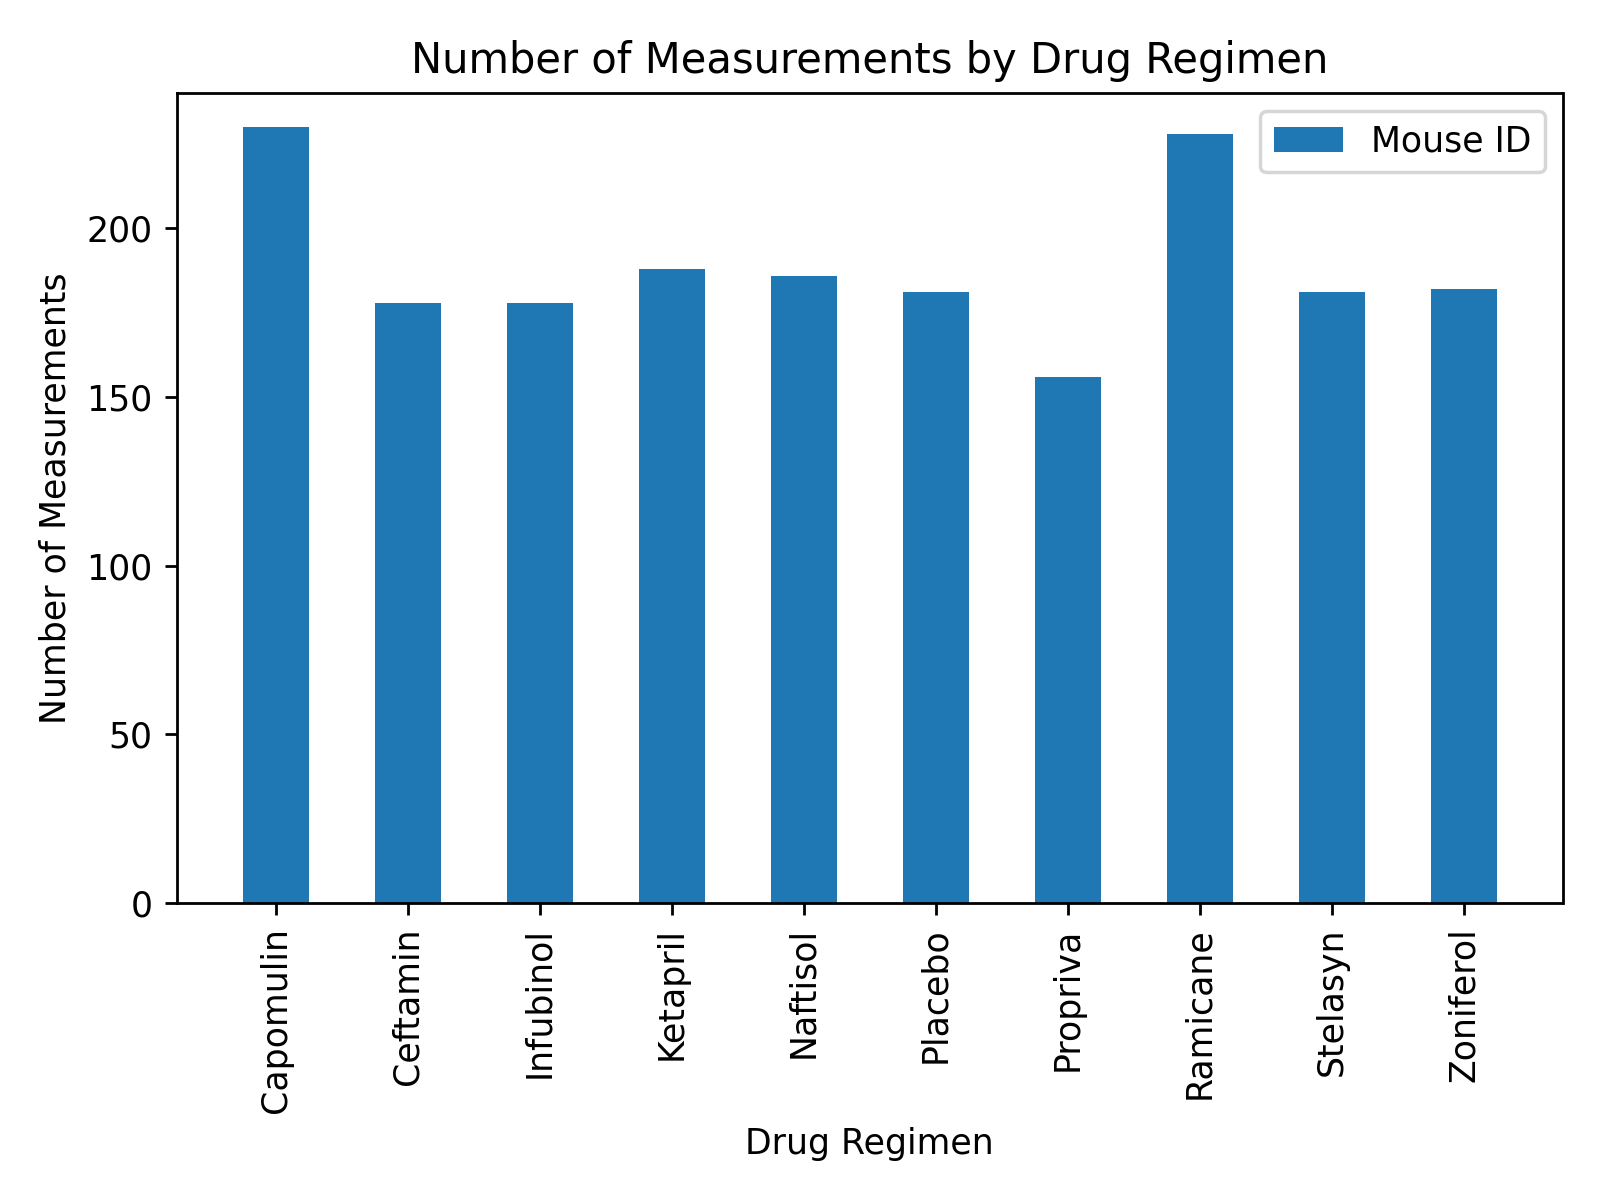

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#--------------------

# 1.) Start by creating a dataframe with just Regimen and Mouse ID
# Will then take counts of Mouse ID to create bar chart
regimen_groupby_df = cleaned_df[['Drug Regimen','Mouse ID']]

# 2.) Create groupby object off of which counts will be calculated
regimen_groupby_obj =  regimen_groupby_df.groupby('Drug Regimen')

# 3.) Calculate counts of drug regimens
regimen_count_df = regimen_groupby_obj.count()

# 4.) Set x axis and tick locations
x_axis = np.arange(len(regimen_count_df))
tick_locations = [value for value in x_axis]

# 5.) Generate pandas plot
regimen_count_plot = regimen_count_df.plot(kind="bar")

# 5.) Adjust plot properties
regimen_count_plot.set_title("Number of Measurements by Drug Regimen")
regimen_count_plot.set_xlabel("Drug Regimen")
regimen_count_plot.set_ylabel("Number of Measurements")
regimen_count_plot.set_ylim(0,max(regimen_count_df['Mouse ID'])+10)
regimen_count_plot.set_xlim(-0.75,len(x_axis)-0.25)

# 6.) Show plot
plt.show()
plt.tight_layout()


In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
